In [26]:
import time

import torch
import torchvision
import cv2
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from matplotlib import pyplot as plt

In [9]:
# custom dataset
class TorchvisionDataset(Dataset):

    def __init__(self, file_path, labels, transform=None):
        self.file_path = file_path
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        label = self.labels[index]
        file_path = self.file_path[index]

        # Image open
        image = Image.open(file_path)

        start_t = time.time()
        if self.transform:
            image = self.transform(image)
        total_time = (time.time() - start_t)

        return image, label, total_time

    def __len__(self):
        return len(self.file_path)

In [11]:
torchvision_dataset = TorchvisionDataset(
    file_path=["./data/image01.jpg"],
    labels=[1],
    transform=torchvision_transform
)

In [4]:
torchvision_dataset = TorchvisionDataset(
    file_path=["./data/image01.jpg"],
    labels=[1],
    transform=torchvision_transform
)

In [13]:
total_time = 0
for i in range(100):
    sample, _, transform_time = torchvision_dataset[0]
    total_time += transform_time

print("torchvision time / sample : {} ms ".format(total_time*10))

torchvision time / sample : 16.33164405822754 ms 


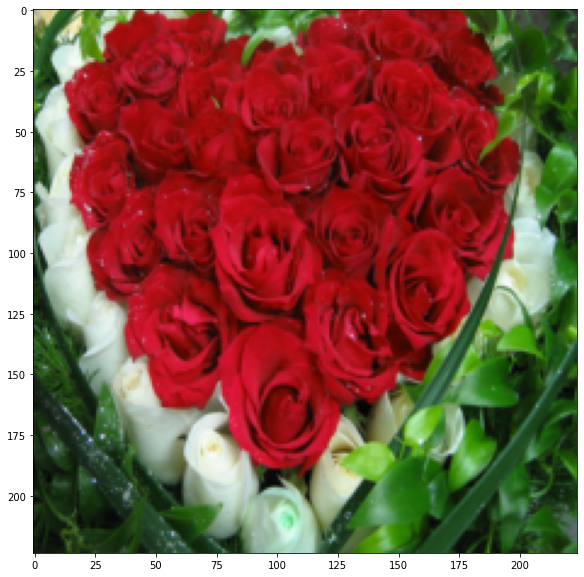

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()

In [27]:
import albumentations
from albumentations.pytorch import ToTensorV2

In [28]:
class AlbumentationsDataset(Dataset):
    def __init__(self, file_path, labels, transform=None):
        self.file_path = file_path
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        label = self.labels[index]
        file_path = self.file_path[index]

        # Image open
        # image = Image.open(file_path)
        image = cv2.imread(file_path)

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        start_t = time.time()
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']

        total_time = (time.time() - start_t)

        return image, label, total_time

    def __len__(self):
        return len(self.file_path)

In [29]:
albumentations_transform = albumentations.Compose([
    albumentations.Resize(256, 256),
    albumentations.RandomCrop(224, 224),
    albumentations.HorizontalFlip(),
    ToTensorV2()
])

In [33]:
albumentations_dataset = AlbumentationsDataset(
    file_path=["./data/image01.jpg"],
    labels=[1],
    transform=albumentations_transform
)

In [34]:
total_time = 0
for i in range(100):
    sample, _, transform_time = albumentations_dataset[0]
    total_time += transform_time

print("torchvision time / sample : {} ms ".format(total_time*10))

torchvision time / sample : 0.7794904708862305 ms 


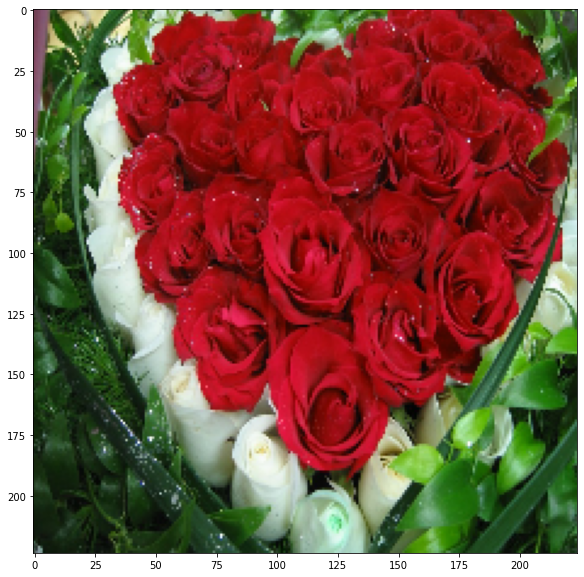

In [35]:
plt.figure(figsize=(10, 10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()